# Study Modeling

## 1. OLS (statsmodels)

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
np.random.seed(9876789)

In [4]:
nsample = 100
x = np.linspace(0, 10, 100)

In [5]:
X = np.column_stack((x, x**2))
X

array([[  0.00000000e+00,   0.00000000e+00],
       [  1.01010101e-01,   1.02030405e-02],
       [  2.02020202e-01,   4.08121620e-02],
       [  3.03030303e-01,   9.18273646e-02],
       [  4.04040404e-01,   1.63248648e-01],
       [  5.05050505e-01,   2.55076013e-01],
       [  6.06060606e-01,   3.67309458e-01],
       [  7.07070707e-01,   4.99948985e-01],
       [  8.08080808e-01,   6.52994592e-01],
       [  9.09090909e-01,   8.26446281e-01],
       [  1.01010101e+00,   1.02030405e+00],
       [  1.11111111e+00,   1.23456790e+00],
       [  1.21212121e+00,   1.46923783e+00],
       [  1.31313131e+00,   1.72431385e+00],
       [  1.41414141e+00,   1.99979594e+00],
       [  1.51515152e+00,   2.29568411e+00],
       [  1.61616162e+00,   2.61197837e+00],
       [  1.71717172e+00,   2.94867871e+00],
       [  1.81818182e+00,   3.30578512e+00],
       [  1.91919192e+00,   3.68329762e+00],
       [  2.02020202e+00,   4.08121620e+00],
       [  2.12121212e+00,   4.49954086e+00],
       [  

In [6]:
beta = np.array([1, 0.1, 10])
beta

array([  1. ,   0.1,  10. ])

In [9]:
e = np.random.normal(size=nsample)
max(e),min(e),len(e)

(2.7175077127857614, -2.2292560562530226, 100)

In [11]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e # 1 + 0.1x + 10x^2
y, len(y)

(array([  2.54840139e-01,   1.18565510e+00,   1.27635314e+00,
          1.16112601e+00,   1.78511436e+00,   3.52969987e+00,
          2.54416244e+00,   8.13271709e+00,   8.22374237e+00,
          1.07088447e+01,   9.77090590e+00,   1.27427689e+01,
          1.71664290e+01,   1.78054139e+01,   2.16076043e+01,
          2.43885176e+01,   2.71948942e+01,   3.10953729e+01,
          3.48375169e+01,   3.66584871e+01,   4.34314561e+01,
          4.62421236e+01,   5.07287303e+01,   5.65598858e+01,
          5.88829622e+01,   6.60133559e+01,   7.07588697e+01,
          7.57657991e+01,   8.25230332e+01,   8.56823443e+01,
          9.26805023e+01,   9.82180809e+01,   1.07247192e+02,
          1.12539081e+02,   1.17354684e+02,   1.25931697e+02,
          1.34581784e+02,   1.40399271e+02,   1.49123122e+02,
          1.56512620e+02,   1.65135390e+02,   1.73424010e+02,
          1.81970096e+02,   1.89362964e+02,   2.00717139e+02,
          2.08222276e+02,   2.16253208e+02,   2.26913961e+02,
        

### 1.1 Fit & Summary

In [12]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.661e+06
Date:                Sun, 05 Jan 2020   Prob (F-statistic):          2.18e-242
Time:                        13:22:09   Log-Likelihood:                -139.13
No. Observations:                 100   AIC:                             284.3
Df Residuals:                      97   BIC:                             292.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8798      0.290      3.029      0.0

In [16]:
X.shape[1]

3

In [20]:
# 다중공선성을 체크하기 위해 vif 계산

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()

vif["Features"] = np.array(['const','x1','x2'])
vif["VIF Values"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

vif.sort_values(by='VIF Values',ascending=False)

,Features,VIF Values
1,x1,15.707383
2,x2,15.707383
0,const,8.649388


## 2. PCR

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 

#from sklearn import cross_validation 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from sklearn.cross_decomposition import PLSRegression, PLSSVD 
from sklearn.metrics import mean_squared_error

In [45]:
df = pd.read_csv('D:\sglee\data\open_data\Hitters.csv', header=0)

In [46]:
df = df.dropna()

In [47]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [48]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [49]:
y = df.Salary

In [50]:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [51]:
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [52]:
pca = PCA() 
X_reduced = pca.fit_transform(scale(X))

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  


In [53]:
X # 263 x 19

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
6,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,1,0,0
7,298.0,73.0,0.0,24.0,24.0,7.0,3.0,509.0,108.0,0.0,41.0,37.0,12.0,121.0,283.0,9.0,0,1,0
8,323.0,81.0,6.0,26.0,32.0,8.0,2.0,341.0,86.0,6.0,32.0,34.0,8.0,143.0,290.0,19.0,1,1,1
9,401.0,92.0,17.0,49.0,66.0,65.0,13.0,5206.0,1332.0,253.0,784.0,890.0,866.0,0.0,0.0,0.0,0,0,0
10,574.0,159.0,21.0,107.0,75.0,59.0,10.0,4631.0,1300.0,90.0,702.0,504.0,488.0,238.0,445.0,22.0,0,0,0


In [54]:
X_reduced.shape

(263, 19)

In [55]:
regr = LinearRegression() 

In [56]:
 pca2 = PCA()

In [57]:
# Split into training and test sets 
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

In [58]:
# Scale the data 
X_reduced_train = pca2.fit_transform(scale(X_train)) 
n = len(X_reduced_train)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  


In [66]:
# 10-fold CV, with shuffle 
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
mse = []

In [67]:
# Calculate MSE with only the intercept (no principal components in regression) 
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='r2')

In [68]:
mse.append(score)

In [69]:
mse

[array([  1.46827038e-02,   2.04003852e+00,   1.67669286e-02,
          5.24903580e-03,   1.46983111e-02,   1.04800421e-03,
          2.60893638e-02,   1.99774786e-01,   5.96914091e-02,
          5.59063980e-02])]

In [70]:
# Calculate MSE using CV for the 19 principle components, adding one component at the time. 
for i in np.arange(1, 20): 
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='r2')
    mse.append(score)

Text(0.5, 1.0, 'Salary')

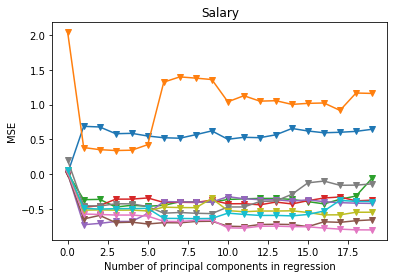

In [77]:
plt.plot(np.array(mse), '-v') 

plt.xlabel('Number of principal components in regression') 

plt.ylabel('MSE') 

plt.title('Salary') 